Loading the dataset

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('car data.csv')

In [3]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Data Cleaning

In [4]:
if df1.isnull().sum().empty == False:
    print('No null records in dataset')

No null records in dataset


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Number of unique values in each column
for column in df1[['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]:
    print('Unique categories in', column, ':', df1[column].nunique())

Unique categories in Car_Name : 98
Unique categories in Year : 16
Unique categories in Selling_Price : 156
Unique categories in Present_Price : 147
Unique categories in Kms_Driven : 206
Unique categories in Fuel_Type : 3
Unique categories in Seller_Type : 2
Unique categories in Transmission : 2
Unique categories in Owner : 3


In [7]:
# current year-year in which the car was bought
df1['no_years'] = 2020 - df1['Year']
df1.drop('Year', axis=1, inplace = True)
df1.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [8]:
df1

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [9]:
# Convert categorical variable into indicator variables
def encode(df):
    for column in df.columns[df.columns.isin(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'])]:
        df[column] = df[column].factorize()[0]
    return df
df_enc = encode(df1)
df_enc

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,0,3.35,5.59,27000,0,0,0,0,6
1,1,4.75,9.54,43000,1,0,0,0,7
2,2,7.25,9.85,6900,0,0,0,0,3
3,3,2.85,4.15,5200,0,0,0,0,9
4,4,4.60,6.87,42450,1,0,0,0,6
...,...,...,...,...,...,...,...,...,...
296,94,9.50,11.60,33988,1,0,0,0,4
297,95,4.00,5.90,60000,0,0,0,0,5
298,94,3.35,11.00,87934,0,0,0,0,11
299,94,11.50,12.50,9000,1,0,0,0,3


In [10]:
#get correlations of each features in dataset
corr = df_enc.corr()['Selling_Price'].to_frame().abs().sort_values(ascending=False, by='Selling_Price').style.background_gradient()
corr

,Selling_Price
Selling_Price,1.000000
Present_Price,0.878983
Seller_Type,0.550724
Fuel_Type,0.509467
Transmission,0.367128
no_years,0.236141
Car_Name,0.102556
Owner,0.088344
Kms_Driven,0.029187


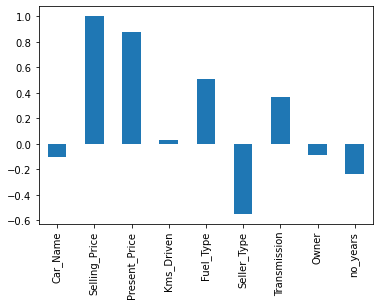

In [11]:
df_enc.corr()['Selling_Price'].plot.bar()

In [12]:
df_enc.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'no_years'],
      dtype='object')

In [13]:
# Re-arranging columns so as to make 'Selling_Price' the first column
# This avoids the error "DataConversionWarning: A column-vector y was passed when a 1d array was expected" while training
df = df_enc[['Selling_Price', 'Car_Name', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'no_years']]

In [14]:
df

,Selling_Price,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,3.35,0,5.59,27000,0,0,0,0,6
1,4.75,1,9.54,43000,1,0,0,0,7
2,7.25,2,9.85,6900,0,0,0,0,3
3,2.85,3,4.15,5200,0,0,0,0,9
4,4.60,4,6.87,42450,1,0,0,0,6
...,...,...,...,...,...,...,...,...,...
296,9.50,94,11.60,33988,1,0,0,0,4
297,4.00,95,5.90,60000,0,0,0,0,5
298,3.35,94,11.00,87934,0,0,0,0,11
299,11.50,94,12.50,9000,1,0,0,0,3


In [15]:
X=df.drop(['Selling_Price'], axis=1)
y=df.iloc[:,0]

In [16]:
X

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,0,5.59,27000,0,0,0,0,6
1,1,9.54,43000,1,0,0,0,7
2,2,9.85,6900,0,0,0,0,3
3,3,4.15,5200,0,0,0,0,9
4,4,6.87,42450,1,0,0,0,6
...,...,...,...,...,...,...,...,...
296,94,11.60,33988,1,0,0,0,4
297,95,5.90,60000,0,0,0,0,5
298,94,11.00,87934,0,0,0,0,11
299,94,12.50,9000,1,0,0,0,3


In [17]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [45]:
# Hyperparameter optimization or tuning
from sklearn.model_selection import RandomizedSearchCV

In [46]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 600, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [47]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 145, 190, 236, 281, 327, 372, 418, 463, 509, 554, 600], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [48]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, n_jobs = 1)

In [49]:
regressor_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=190, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=190, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=190, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=190, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=190, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=190, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=190, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=190, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=190, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=190, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=236, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=236, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=236, min_samples_split=10, 

[CV]  n_estimators=236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.5s
[CV] n_estimators=236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.4s
[CV] n_estimators=236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.4s
[CV] n_estimators=236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.4s
[CV] n_estimators=236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.4s
[CV] n_estimators=463, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   33.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 145, 190, 236,
                                                         281, 327, 372, 418,
                                                         463, 509, 554, 600]},
                   scoring='neg_mean_squared_error', verbose=2)

In [50]:
# Prediction
predictions=regressor_random.predict(X_test)

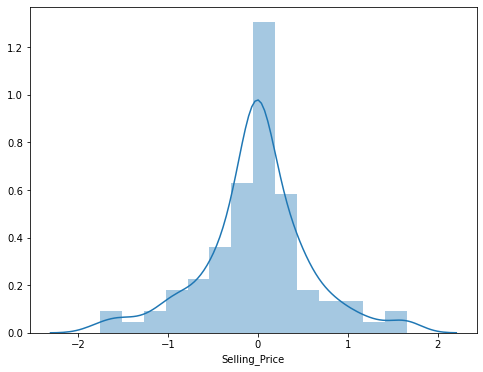

In [51]:
plt.figure(figsize=(8,6))
sns.distplot(y_test-predictions)

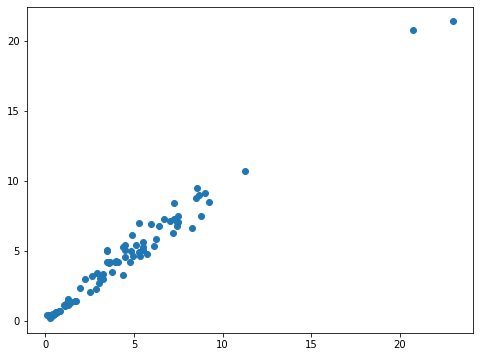

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,predictions)

In [53]:
from sklearn import metrics

from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.9757866485931028

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4095572896791677
MSE: 0.35875925473730913
RMSE: 0.5989651531911595


In [55]:
# Saving model to disk
import pickle
# Open a file to store the data
file = open('regressor_random.pkl', 'wb')

# dump information to that file
pickle.dump(regressor_random, file)